In [1]:
import pandas as pd

csv_path = r'C:\Users\hp\Desktop\preply\lars\project\module 2\preprocessed_data.csv'
df = pd.read_csv(csv_path)

In [2]:
def display(df):
    for index, row in df.iterrows():
        print(row['Highlights'], "\n", row['Investment Rationale'], "\n", row['Industry Outlook'])

In [3]:
df.head()

,Name,Highlights,Investment Rationale,Industry Outlook
0,EQUITY Factsheet_ A.P. Moller - Maersk A_S,"['highlight', 'maersk', 'ebitda', 'billion', '...","['invest', 'call', 'sell', 'believ', 'maersk',...","['industri', 'outlook', 'maintain', 'sector', ..."


    Removing titles from all the columns:

In [4]:
df['Highlights'] = df['Highlights'].apply(lambda x: ' '.join(x.split()[1:]))
df['Investment Rationale'] = df['Investment Rationale'].apply(lambda x: ' '.join(x.split()[1:]))
df['Industry Outlook'] = df['Industry Outlook'].apply(lambda x: ' '.join(x.split()[2:]))


In [24]:
display(df)

'maersk', 'ebitda', 'billion', 'consensu', 'estim', 'attribut', 'good', 'cost', 'manag', 'instead', 'strong', 'rate', 'fall', 'earn', 'mainli', 'caus', 'ocean', 'reduc', 'freight', 'rate', 'weaker', 'volum', 'maersk', 'lift', 'bottom', 'end', 'ebitda', 'guidanc', 'billion', 'billion', 'reflect', 'stronger', 'result', 'lower', 'market', 'volum', 'outlook', 'previous', 'continu', 'inventori', 'correct', 'till', 'end', 'think', 'impli', 'sequenti', 'drop', 'earn', 'reflect', 'ongo', 'declin', 'maersk', 'contract', 'rate', 'given', 'reset', 'level', 'nearer', 'spot', 'fallen', 'sharpli', 'sinc', 'also', 'gather', 'industri', 'suppli', 'new', 'vessel', 'may', 'increas', 'freight', 'capac', 'respect', 'think', 'outgrow', 'demand', 'caus', 'overcapac', 'deterior', 'freight', 'forecast', 'ep', 'expect', 'weak', 'freight', 'rate'] 
 'call', 'sell', 'believ', 'maersk', 'financi', 'perform', 'vulner', 'lower', 'freight', 'rate', 'downward', 'trend', 'due', 'continu', 'subdu', 'demand', 'eas', 'po

    Vectorization:

- Vectorization converts textual data into numerical vectors, which are suitable for machine learning algorithms. 
- It essentially transforms each text document into a vector in a high-dimensional space

    Using TF-IDF Vectorization:

- This component measures the frequency of a term (word) in a document. 
- It's calculated as the number of times a term appears in a document divided by the total number of terms in that document. 
- The idea is that terms with higher frequencies are more important to the document's content.

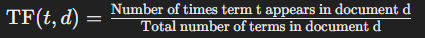

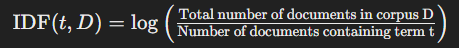

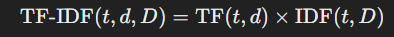

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text columns using TF-IDF Vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Highlights'] + ' ' + df['Investment Rationale'] + ' ' + df['Industry Outlook'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [27]:
tfidf_df.head()

,accord,activ,aerospac,affect,aircraft,airlin,alan,also,although,amplifi,...,versu,vessel,via,view,volum,vulner,weak,weaker,widen,year
0,0.02665,0.0533,0.02665,0.1066,0.02665,0.02665,0.02665,0.07995,0.07995,0.02665,...,0.02665,0.0533,0.02665,0.02665,0.1066,0.02665,0.07995,0.02665,0.02665,0.02665


In [6]:
tfidf_df.to_csv(r'C:\Users\hp\Desktop\preply\lars\project\module 2\vectorized_df.csv', index=False)